In [2]:
from dotenv import load_dotenv
import os
import dotenv
import pandas as pd
import re
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
import requests
import json


In [4]:

api_key_base = os.environ.get('FRED_API_KEY')
api_key = '&api_key=' + str(api_key_base) + '&file_type=json'

search_url=r'https://api.stlouisfed.org/fred/series/search?search_text=real+gdp+us&'

#search
search_request = requests.get(search_url + api_key)
json_item = json.loads(search_request.text)
# print(json_item)
json_item = json_item["seriess"]
df_brent = pd.DataFrame(json_item)
# print(df_brent.shape)
# print("Brent")
print(df_brent.head)
print(df_brent.columns)
print(df_brent.shape)
print(df_brent.iloc[0])

# for index,row in 

# x = Brent()
# x.search()

<bound method NDFrame.head of                    id realtime_start realtime_end  \
0               GDPC1     2025-02-07   2025-02-07   
1     A191RL1Q225SBEA     2025-02-07   2025-02-07   
2               GDPCA     2025-02-07   2025-02-07   
3           ND000334Q     2025-02-07   2025-02-07   
4     A191RO1Q156NBEA     2025-02-07   2025-02-07   
..                ...            ...          ...   
995       SCSAMINQGSP     2025-02-07   2025-02-07   
996  SWSTRAILTRANQGSP     2025-02-07   2025-02-07   
997   MANATRESMINQGSP     2025-02-07   2025-02-07   
998     NCACCOMDQQGSP     2025-02-07   2025-02-07   
999  NDARTENTRECQQGSP     2025-02-07   2025-02-07   

                                                 title observation_start  \
0                          Real Gross Domestic Product        1947-01-01   
1                          Real Gross Domestic Product        1947-04-01   
2                          Real Gross Domestic Product        1929-01-01   
3                          Re

In [ ]:
# GDP
gdp_url = r'https://api.stlouisfed.org/fred/series/observations?series_id=GDPC1&realtime_start=1776-07-04&realtime_end=9999-12-31'

gdp_request = requests.get(gdp_url + api_key)
json_item = json.loads(gdp_request.text)
json_item = json_item["observations"]
df_gdp = pd.DataFrame(json_item)
print(df_gdp.shape)
print("GDP")
print(df_gdp.head)
print(df_gdp.columns)
print(df_gdp.shape)


# Coercing 'date' to a datetime and 'value' to float
df_gdp["date"] = pd.to_datetime(df_gdp["date"])
df_gdp["value"] = pd.to_numeric(df_gdp["value"], errors='coerce')

# Creating a new column which represents the month of the value
df_gdp["year_month"] = df_gdp["date"].dt.to_period("M").astype(str)

# Obtaining the unique months
unique_months = pd.unique(df_gdp["year_month"])

# Aggregate by month
sum_array = []
for month in unique_months:
    gdp_month_prod_vol = df_gdp[df_gdp["year_month"] == month]

    month_sum = gdp_month_prod_vol["value"].sum()
    sum_array.append(month_sum)

# Create final DataFrame
data_dict = {"month": unique_months , "value": sum_array}
df_gdp_month = pd.DataFrame(data = data_dict)
print(df_gdp_month.head)
print(df_gdp_month.shape) 

(4364, 4)
GDP
<bound method NDFrame.head of      realtime_start realtime_end        date      value
0        1992-12-22   1996-01-18  1947-01-01     1239.5
1        1996-01-19   1997-05-06  1947-01-01          .
2        1997-05-07   1999-10-27  1947-01-01     1402.5
3        1999-10-28   2000-04-26  1947-01-01          .
4        2000-04-27   2003-12-09  1947-01-01     1481.7
...             ...          ...         ...        ...
4359     2024-09-26   9999-12-31  2024-04-01  23223.906
4360     2024-10-30   2024-11-26  2024-07-01  23386.248
4361     2024-11-27   2024-12-18  2024-07-01  23386.733
4362     2024-12-19   9999-12-31  2024-07-01  23400.294
4363     2025-01-30   9999-12-31  2024-10-01  23530.909

[4364 rows x 4 columns]>
Index(['realtime_start', 'realtime_end', 'date', 'value'], dtype='object')
(4364, 4)
21288.863
21295.936
21297.833
21621.268
21937.276
22291.09
22409.479000000003
22450.414
22147.992000000002
22073.91
22310.759
22107.144
22993.0
23691.126000000004
24605.315


In [29]:
df_gdp_ma = pd.DataFrame()
# df_gdp_ma['7_MA'] = df_gdp['value'].rolling(7).mean()
months = pd.unique(df_gdp['date'])
count = 0
date_array = []
value_array = []
sum_counter = 0
for index,month in enumerate(months):
    if count == 6:
        date_array.append(month)
        value_array.append(sum_counter)
        # print(sum_counter)
        count == 0
        sum_counter=0
    else:
        if df_gdp['value'].iloc[index]:
            sum_counter = sum_counter + df_gdp['value'].iloc[index]
            print(sum_counter)
            # print(df_gdp['value'].iloc[index])
        count+=1
print(len(date_array))
print(len(value_array))
df_gdp_ma['date'] = date_array
df_gdp_ma['value'] = value_array
# df_gdp_ma = df_gdp[['date', '7_MA']] 
print(df_gdp_ma.head)

1239.5
nan
nan
nan
nan
nan
306
306
<bound method NDFrame.head of           date  value
0   1948-07-01    NaN
1   1948-10-01    0.0
2   1949-01-01    0.0
3   1949-04-01    0.0
4   1949-07-01    0.0
..         ...    ...
301 2023-10-01    0.0
302 2024-01-01    0.0
303 2024-04-01    0.0
304 2024-07-01    0.0
305 2024-10-01    0.0

[306 rows x 2 columns]>


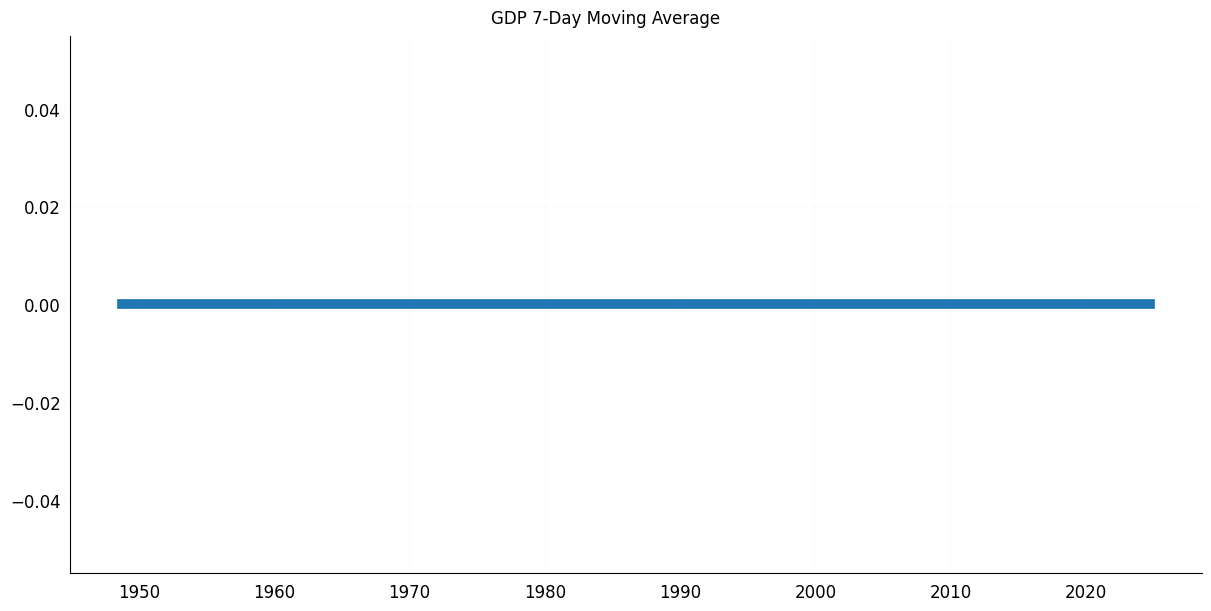

In [25]:
# Plot
# https://matplotlib.org/stable/gallery/showcase/stock_prices.html#sphx-glr-gallery-showcase-stock-prices-py
fig, ax = plt.subplots(1, 1, figsize=(12, 6), layout='constrained')
line, = ax.plot(df_gdp_ma["date"], df_gdp_ma["value"], lw=7)

# Title
fig.suptitle("GDP 7-Day Moving Average", ha="center")

# Grid
ax.grid(True, 'major', 'both', ls='--', lw=.05, c='k', alpha=.3)

ax.tick_params(
    axis='both', which='both', labelsize='large', 
    bottom=False, top=False, labelbottom=True, 
    left=False, right=False, labelleft=True
)

# Format x-axis
# ax.set_xticks(df_gdp_month["month"][::48])
# plt.xticks(rotation=45, ha='right')
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# Make only left and bottom spines visible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))